In [1]:
import numpy as np
import tensorflow as tf
import pickle
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

from PIL import Image

# 讀取 not Muist 數字手寫資料 pickle
with open('new_notMNIST.pickle', 'rb') as file:
    (x_train, t_train), (x_valid, t_valid), (x_test,t_test) = pickle.load(file)
    
def img_show(img):
    return Image.fromarray(np.uint8(img*255))

def trans(arr):
    num = int(arr.shape[0]**0.5)
    arr = arr.reshape(num, num, 28, 28).transpose(0, 2, 1, 3).reshape(num*28, num*28)
    
    return arr

def create_layer(inputs, in_size, out_size, n_layer, activation_function=None):
    layer_name = 'layer' + n_layer
    # W & b 初始化條件 init
    W_init = tf.random_normal_initializer(stddev=(2.0/in_size)**0.5, seed=59)
    b_init = tf.random_normal_initializer(stddev=(2.0/in_size)**0.5, seed=59)
    # W & b 變數設定
    Weights = tf.get_variable(name=layer_name+'_W', shape=[in_size, out_size], initializer=W_init)
    #tf.summary.histogram('weights', Weights) # 紀錄資料
    biases = tf.get_variable(name=layer_name+'_b', shape=[out_size], initializer=b_init)
    #tf.summary.histogram('biases', biases) # 紀錄資料
    Wx_plus_b = tf.add(tf.matmul(inputs, Weights), biases)
    #Wx_plus_b = tf.matmul(inputs, Weights)
    # 激活函數設定
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    #tf.summary.histogram('outputs', outputs)
    
    return outputs

In [2]:
with tf.name_scope('inputs'):
    inputs = tf.placeholder(tf.float32, [None, 784], name='x_input')
    
with tf.variable_scope('encoder1'):
    encoder1 = create_layer(inputs, 784, 250, n_layer='en1', activation_function=tf.nn.relu)

with tf.variable_scope('encoder2'):
    encoder2 = create_layer(encoder1, 250, 80, n_layer='en2', activation_function=tf.nn.relu)
    
with tf.variable_scope('encoder3'):
    encoder3 = create_layer(encoder2, 80, 30, n_layer='en3', activation_function=tf.nn.relu)
    
with tf.variable_scope('encoder4'):
    encoder4 = create_layer(encoder3, 30, 2, n_layer='en4', activation_function=tf.nn.relu)

with tf.variable_scope('decoder1'):
    decoder1 = create_layer(encoder4, 2, 30, n_layer='de1', activation_function=tf.nn.relu)

with tf.variable_scope('decoder2'):
    decoder2 = create_layer(decoder1, 30, 80, n_layer='de2', activation_function=tf.nn.relu)
    
with tf.variable_scope('decoder3'):
    decoder3 = create_layer(decoder2, 80, 250, n_layer='de3', activation_function=tf.nn.relu)
    
with tf.variable_scope('decoder4'):
    decoder4 = create_layer(decoder3, 250, 784, n_layer='de4', activation_function=tf.nn.relu)
    
with tf.name_scope('outputs'):    
    outputs = decoder4 / tf.reduce_max(decoder4, axis=1)[:, tf.newaxis]

# cross entropy
with tf.name_scope('loss'):
    # 輸入為 batch 使用平均值 mean + L2正則化
    loss = tf.reduce_mean(tf.reduce_sum(tf.pow((outputs - inputs), 2)/2, axis=1)) \
    + 0.05 * tf.reduce_mean(tf.reduce_sum(tf.pow(encoder4, 2), axis=1)) # L2正則化
    #tf.summary.scalar('loss', loss) # 紀錄資料

train_way = tf.train.MomentumOptimizer(learning_rate=0.0005, momentum=0.90)
#train_way = tf.train.AdamOptimizer() 

with tf.name_scope('train'):
    train_step = train_way.minimize(loss)

sess = tf.Session()
#merged = tf.summary.merge_all() # 所以紀錄資料設定
#writer = tf.summary.FileWriter("logs/", sess.graph) # 紀錄圖形
sess.run(tf.global_variables_initializer()) # 變數初始化
i_ = 1

In [3]:
data_num = x_test.shape[0]
batch = 50
lst = np.arange(data_num)
# train epoch
for ii in range(50):
    # 隨機打亂資料排序
    np.random.shuffle(lst)
    x_test = x_test[lst]
    # train 
    for i in range(0, data_num, batch):  # 每 bench 100個資料
        feed_data = {inputs: x_test[i:i + batch]}
        sess.run(train_step, feed_dict=feed_data)
        
    #result = sess.run(merged, feed_dict=feed_data) # 寫入紀錄
    #writer.add_summary(result, i_)
    
    los = sess.run(loss, feed_dict={inputs:x_test})
    print('%3d  loss:%.4f'%(i_, los))
    i_ += 1
    
# in win10 open powershell key:  tensorboard --logdir="logs" 

  1  loss:102.8947
  2  loss:96.2673
  3  loss:95.0269
  4  loss:94.0106
  5  loss:92.3684
  6  loss:91.6571
  7  loss:90.7507
  8  loss:85.5546
  9  loss:78.0640
 10  loss:73.7321
 11  loss:70.7458
 12  loss:69.3458
 13  loss:68.5591
 14  loss:67.4039
 15  loss:65.9268
 16  loss:64.9460
 17  loss:63.4346
 18  loss:62.0905
 19  loss:61.2426
 20  loss:60.3474
 21  loss:59.8581
 22  loss:58.7851
 23  loss:58.1169
 24  loss:57.7741
 25  loss:56.8876
 26  loss:56.1407
 27  loss:55.4317
 28  loss:55.0380
 29  loss:54.3722
 30  loss:52.8033
 31  loss:52.6351
 32  loss:51.8305
 33  loss:51.7821
 34  loss:51.4331
 35  loss:51.0990
 36  loss:50.9068
 37  loss:50.1610
 38  loss:49.6698
 39  loss:49.6028
 40  loss:49.0194
 41  loss:48.8057
 42  loss:48.7513
 43  loss:48.0411
 44  loss:48.2180
 45  loss:48.2716
 46  loss:47.4147
 47  loss:47.2545
 48  loss:46.8745
 49  loss:47.2587
 50  loss:46.9900


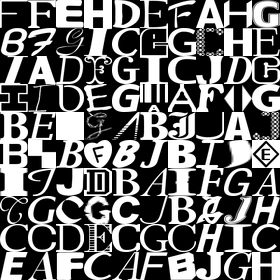

In [4]:
img_show(trans(x_test[0:100]))

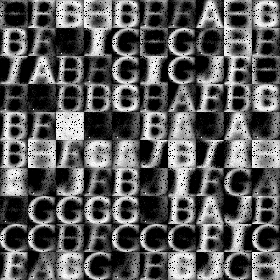

In [5]:
op = sess.run(outputs, feed_dict={inputs: x_test[0:100]})
img_show(trans(op))

(0, 3)

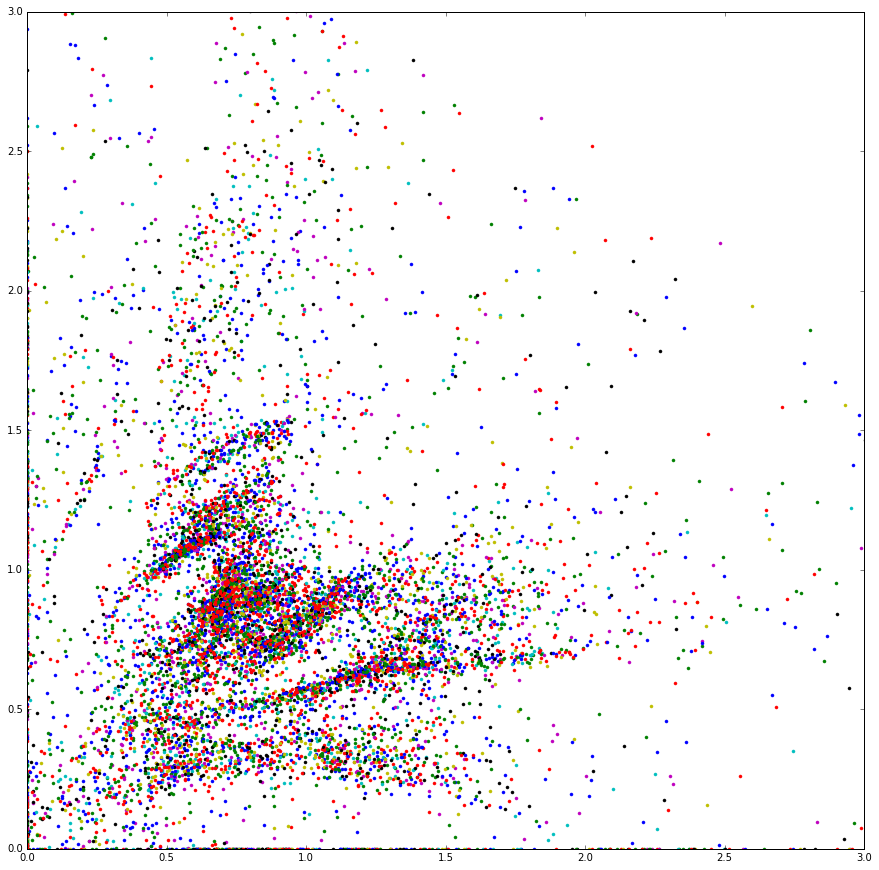

In [6]:
ar0 = sess.run(encoder4, feed_dict={inputs: x_test[t_test.argmax(axis=1) == 0]})
ar1 = sess.run(encoder4, feed_dict={inputs: x_test[t_test.argmax(axis=1) == 1]})
ar2 = sess.run(encoder4, feed_dict={inputs: x_test[t_test.argmax(axis=1) == 2]})
ar3 = sess.run(encoder4, feed_dict={inputs: x_test[t_test.argmax(axis=1) == 3]})
ar4 = sess.run(encoder4, feed_dict={inputs: x_test[t_test.argmax(axis=1) == 4]})
ar5 = sess.run(encoder4, feed_dict={inputs: x_test[t_test.argmax(axis=1) == 5]})
ar6 = sess.run(encoder4, feed_dict={inputs: x_test[t_test.argmax(axis=1) == 6]})
ar7 = sess.run(encoder4, feed_dict={inputs: x_test[t_test.argmax(axis=1) == 7]})
ar8 = sess.run(encoder4, feed_dict={inputs: x_test[t_test.argmax(axis=1) == 8]})
ar9 = sess.run(encoder4, feed_dict={inputs: x_test[t_test.argmax(axis=1) == 9]})

fig, ax = plt.subplots(figsize=(15, 15))
ax.plot(ar0[:, 0], ar0[:, 1], '.')
ax.plot(ar1[:, 0], ar1[:, 1], '.')
ax.plot(ar2[:, 0], ar2[:, 1], '.')
ax.plot(ar3[:, 0], ar3[:, 1], '.')
ax.plot(ar4[:, 0], ar4[:, 1], '.')
ax.plot(ar5[:, 0], ar5[:, 1], '.')
ax.plot(ar6[:, 0], ar6[:, 1], '.')
ax.plot(ar7[:, 0], ar7[:, 1], '.')
ax.plot(ar8[:, 0], ar8[:, 1], '.')
ax.plot(ar9[:, 0], ar9[:, 1], '.')
plt.xlim(0, 3)
plt.ylim(0, 3)